IMPORT NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Load the required sales file

In [3]:
import pandas as pd

sales = pd.read_csv('Walmart_Sales.csv')

In [11]:
sales.head(50)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


Check for the missing values

In [6]:
sales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

check the data types of each column

In [7]:
sales.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Convert date column to date/time format

In [14]:
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%m-%Y')
sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


CONVERT THE HLOLIDAY_FLAG TO A CATEGORICAL VARIABLE

In [16]:
sales['Holiday_Flag'] = sales['Holiday_Flag'].astype('category')
sales.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag          category
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

unique values in holiday_flag

In [18]:
sales['Holiday_Flag'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [19]:
sales.describe()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,18.444933,0.459020,39.356712,1.875885


find number of duplicates if any

In [21]:
sales.duplicated().sum()

0

check for negative values

In [32]:
sales[sales['Weekly_Sales']>3000000]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
1385,10,2011-12-23,3487986.89,0,48.36,3.541,129.984548,7.874
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795
1814,13,2011-12-23,3556766.03,0,24.76,3.186,129.984548,6.392
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724


examine the outliers using the boxplot

<Axes: ylabel='Weekly_Sales'>

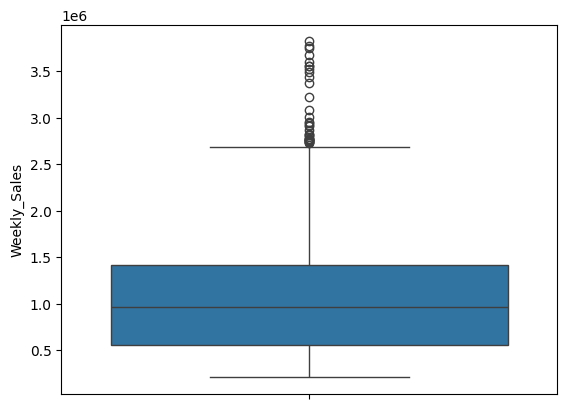

In [34]:
sns.boxplot(sales['Weekly_Sales'])